In [1]:
# usual packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from collections import defaultdict

# machine learning packages
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
%matplotlib inline

Using TensorFlow backend.


In [2]:
cosmos = pd.read_csv('match_COSMOS_99_with_err_1.csv')
cosmos=cosmos.loc[:,["B_MAG_APER2","H_MAG_APER2","Hw_MAG_APER2","IA484_MAG_APER2","IA527_MAG_APER2","IA624_MAG_APER2",
            "IA679_MAG_APER2","IA738_MAG_APER2","IA767_MAG_APER2","IB427_MAG_APER2","IB464_MAG_APER2","IB505_MAG_APER2",
            "IB574_MAG_APER2","IB709_MAG_APER2","IB827_MAG_APER2","J_MAG_APER2","Ks_MAG_APER2","Ksw_MAG_APER2",
            "NB711_MAG_APER2","NB816_MAG_APER2","SPLASH_1_MAG","SPLASH_2_MAG","SPLASH_3_MAG","SPLASH_4_MAG","V_MAG_APER2",
            "Y_MAG_APER2","ip_MAG_APER2","r_MAG_APER2","yHSC_MAG_APER2","zpp_MAG_APER2",'zspec']]


In [3]:
def preprocess(df, zspec_drop=True, magnitude_drop=True):
    
    df_new=df.copy()
    print(df_new.shape)
    df_new=df_new.replace({-99.9:random.random()*(df_new.max())})
    if (magnitude_drop==True):
        df_new=df_new[(df_new["IA767_MAG_APER2"]<=22.5) & ( df_new["IA767_MAG_APER2"]>=17)]
    if (zspec_drop == True):
        df_new=df_new[(df_new['zspec']>0)&(df_new['zspec']<=1.5)]
    return df_new.iloc[:,:-1] , df_new.iloc[:,-1]
    print(df_new.shape)
photo_bands,zspec=preprocess(cosmos)
stdScaler= StandardScaler()
stdScaler.fit(photo_bands)
photo_bands=stdScaler.transform(photo_bands)

(391103, 31)


In [4]:
X_train,X_test,Y_train,Y_test = train_test_split(photo_bands, zspec, test_size=0.2)

In [5]:
rf=RandomForestRegressor()
ds=DecisionTreeRegressor()
nn = MLPRegressor()
nHiddenUnits = [100,100,100]
svm = SVR()
knn=KNeighborsRegressor()

param_grid={'RF':{'n_estimators':[5,25,20],'random_state':[0]},'DS':{'random_state':[0]},'NN':{'hidden_layer_sizes':nHiddenUnits,'activation':['relu'],'max_iter':[4000],'random_state':[0]},'SVM':{'C':[1.0]},'KNN':{'n_neighbors':np.arange(1,25)}}
methods_ls={'RF':rf,'DS':ds,'NN':nn,'SVM':svm,'KNN':knn}
z_pres=defaultdict(dict)

In [34]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, scoring=None, n_jobs=None, iid='warn', refit=True, cv='warn', verbose=0, pre_dispatch='2*n_jobs', error_score='raise-deprecating', return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator interface.
 |     

In [6]:
print(methods_ls.keys())
for name,instance in methods_ls.items():
    if(param_grid[name] != None):
        print(name)
        gd_srf=GridSearchCV(estimator=instance,param_grid=param_grid[name],cv=5)
        gd_srf.fit(X_train,Y_train)
        z_pres[name]=gd_srf.predict(X_test)
        print('score',gd_srf.best_score_)
        print('MAE:',metrics.mean_absolute_error(Y_test,z_pres[name]))
        print('RMSE',metrics.mean_squared_error(Y_test,z_pres[name]))
    else:
        raise Exception('error occured')

dict_keys(['RF', 'DS', 'NN', 'SVM', 'KNN'])
RF
score 0.7997521188459875
MAE: 0.052358994329116094
RMSE 0.01223505824476789
DS
score 0.6031155841422409
MAE: 0.07264378787878788
RMSE 0.023729108550143815
NN
score 0.7712845178668152
MAE: 0.07883604361172947
RMSE 0.016326861283481302
SVM


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

score 0.7831756995233917
MAE: 0.06061495409506607
RMSE 0.012594943930140665
KNN
score 0.7445525927533824
MAE: 0.057831512433754576
RMSE 0.015106531897105587


In [8]:
def all_sigma(z_predict):
    sigma = np.std(z_predict)
    return sigma

def all_sigma_68(z_predict):
    z_predict_sort = pd.DataFrame(z_predict).sort_values(by=0,ascending=True)
    z_predict_sort = z_predict_sort.reset_index(drop=True)
    
    lower = int (len(z_predict_sort) * 0.16)
    upper = int (len(z_predict_sort) * 0.84)
    data_68 = z_predict_sort[lower:upper]
    sigma_68 = np.std(data_68)
    return sigma_68
    

In [73]:
def metrics(name,z_spec_test,z_predict):
    #to find bins_interval
    plt.figure()
    hist=plt.hist(z_spec_test,bins=90)
    bins_interval = hist[1]
    plt.title('histgram')
    plt.xlabel('z_spec')
    plt.ylabel('predict z_spec')
    data_hist_statitics=pd.DataFrame(columns=["z_predict","z_spec_test","sigma","sigma_68","mean","mean_68"])
    #create an original dataset for predict value and zspec(test) value
    data_hist_statitics["z_predict"] = z_predict
#     print(z_spec_test)
    data_hist_statitics["z_spec_test"] = z_spec_test
    data_hist_statitics["sigma"]=0
    data_hist_statitics["sigma_68"]=0
    data_hist_statitics["mean"]=0
    data_hist_statitics["mean_68"]=0

    data_with_outlier=pd.DataFrame()
    data_without_outlier=pd.DataFrame()
    
    data_outlier=pd.DataFrame()
    z_spec_test_medium=[]
    error_bar_mean=[]
    error_bar_mean_68=[]
    error_bar_std=[]
    error_bar_std_68=[]
    frac_outliers=[]
    frac_outlier_mean=[]
    frac_outlier_std=[]
    for i in range(len(bins_interval)-1):
        lower = bins_interval[i]
        upper = bins_interval[i+1]
        medium = lower/2 + upper/2
        z_spec_test_medium.append(medium)

        #create bin dataset (100%) with outliers
        bin_data = data_hist_statitics[(data_hist_statitics["z_spec_test"]>=lower)&(data_hist_statitics["z_spec_test"]<upper)]
        bin_data["sigma"] = np.std(bin_data["z_predict"])
        bin_data["mean"] = np.mean(bin_data["z_predict"])
        error_bar_mean.append(np.mean(bin_data["z_predict"]))
        error_bar_std.append(np.std(bin_data["z_predict"]))
        data_with_outlier = pd.concat([data_with_outlier,bin_data],ignore_index=True)

        #create 68% each bin dataset without outliers
        lower = np.mean(bin_data["z_predict"]) - np.std(bin_data["z_predict"])
        upper = np.mean(bin_data["z_predict"]) + np.std(bin_data["z_predict"])
        bin_data_68 = bin_data[(bin_data["z_predict"]>=lower)&(bin_data["z_predict"]<upper)]
        bin_data_68["sigma_68"] = np.std(bin_data_68["z_predict"])
        bin_data_68["mean_68"] = np.mean(bin_data_68["z_predict"])
        error_bar_mean_68.append(np.mean(bin_data_68["z_predict"]))
        error_bar_std_68.append(np.std(bin_data_68["z_predict"]))
        data_without_outlier = pd.concat([data_without_outlier,bin_data_68],ignore_index=True)

        #create outlier bin dataset
        bin_data_outlier = bin_data[(bin_data["z_predict"]<lower)|(bin_data["z_predict"]>=upper)]
        bin_data_outlier["fraction"] = (bin_data_outlier["z_predict"] - np.mean(bin_data["z_predict"]))/np.mean(bin_data["z_predict"])
        frac_outlier_mean.append(np.mean(bin_data_outlier["fraction"]))
        frac_outlier_std.append(np.std(bin_data_outlier["fraction"]))
    
#     plt.figure(figsize=(8,15))
#     plt.subplot2grid((12,1),(0,0),rowspan = 4)
    plt.figure(figsize=(7,7))
    plt.scatter(z_spec_test,z_predict,s=3,label='data points')
    plt.errorbar(z_spec_test_medium,error_bar_mean,yerr=error_bar_std,marker='s', fmt='none',color='red',capsize=3,label='error')
    plt.title(name)
    plt.xlabel('z_spec')
    plt.ylabel('predict z_spec')
    plt.legend()
    plt.savefig(name+'--undiscarded data')
    plt.ylim([-0.1,1.6])

#     plt.subplot2grid((12,1),(4,0),rowspan = 4)
    plt.figure(figsize=(7,7))
    plt.scatter(z_spec_test,z_predict,s=3,label='data points')
    plt.errorbar(z_spec_test_medium,error_bar_mean_68,yerr=error_bar_std_68,fmt='none',color='red',capsize=3,label='error')
    plt.title(name)
    plt.xlabel('z_spec')
    plt.ylabel('predict z_spec')
    plt.legend()
    plt.savefig(name+'--discarded data')
    plt.ylim([-0.1,1.6])
    
#     plt.subplot2grid((12,1),(8,0),rowspan = 4)
    plt.figure(figsize=(7,7))
    plt.errorbar(z_spec_test_medium,frac_outlier_mean,yerr=frac_outlier_std,fmt='none',color='red',capsize=3,label='error')
    plt.scatter(z_spec_test_medium,frac_outlier_mean,s=3,label='data points')
    plt.title(name)
    plt.xlabel('z_spec')
    plt.ylabel('fraction value')
    plt.legend()
    plt.savefig(name+'----outlier data')
    plt.ylim([-1,5])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

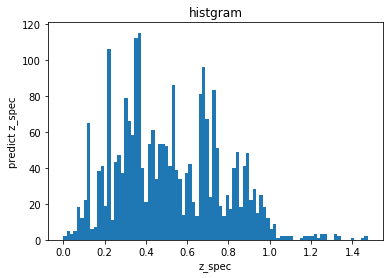

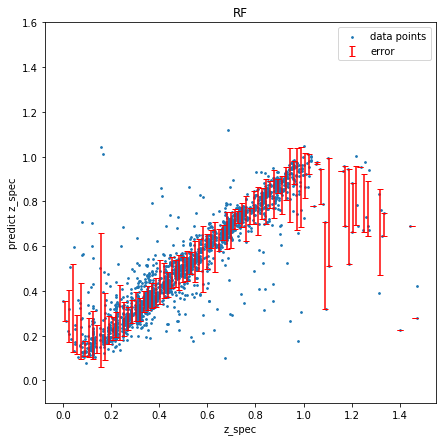

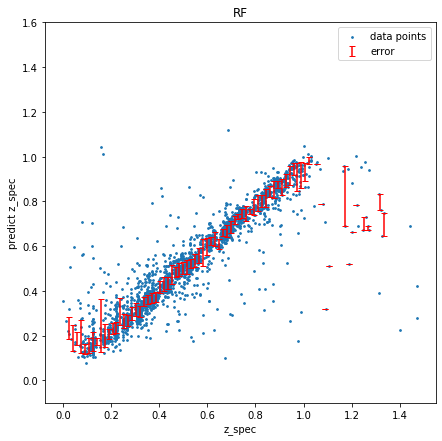

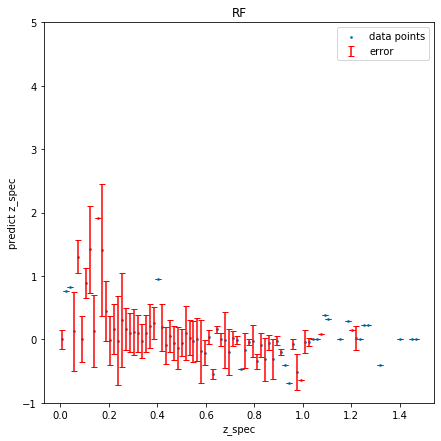

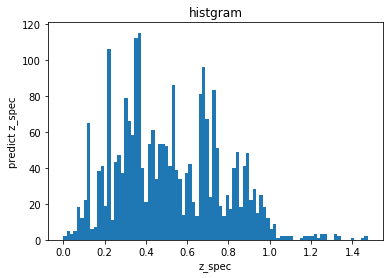

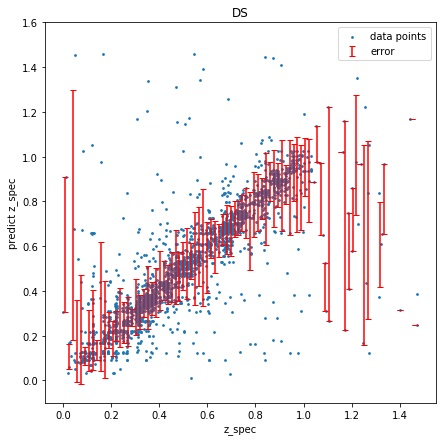

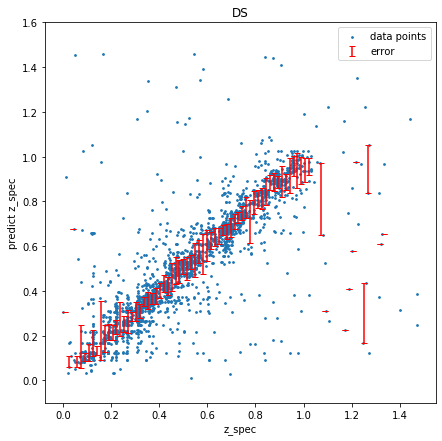

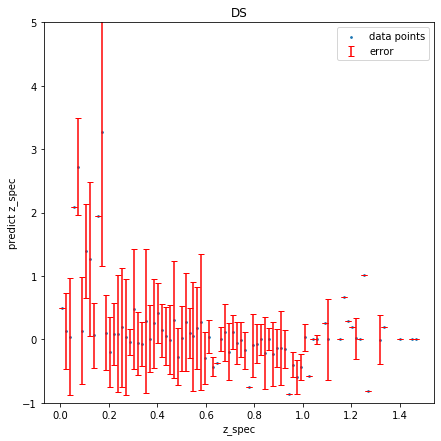

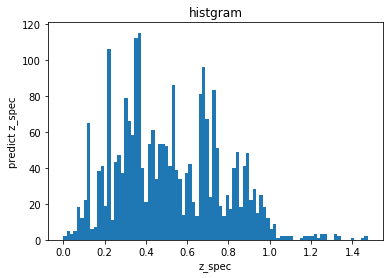

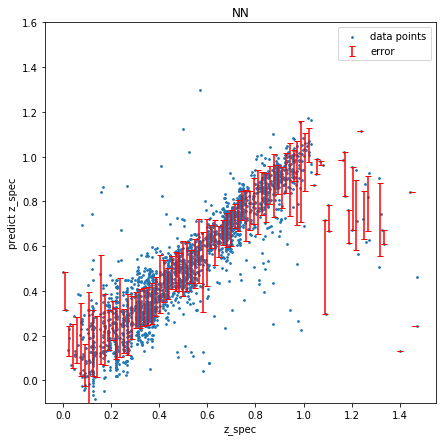

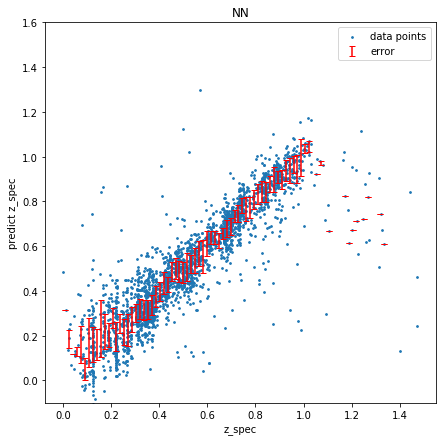

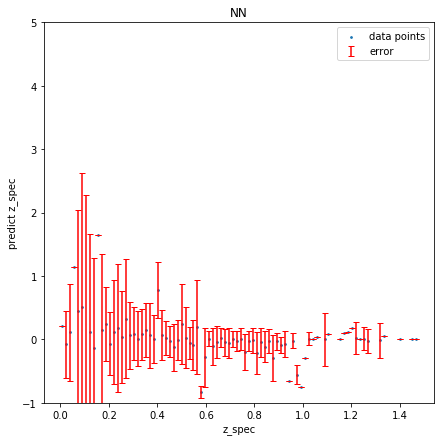

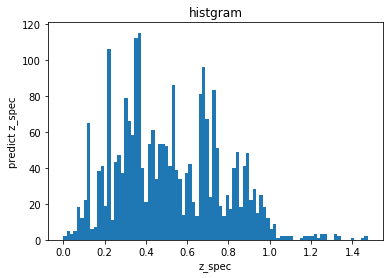

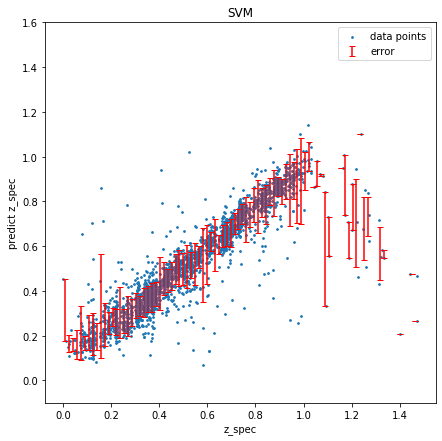

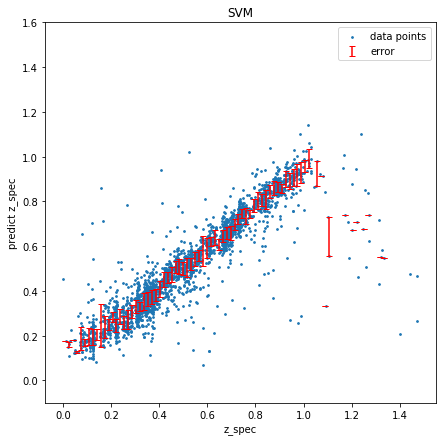

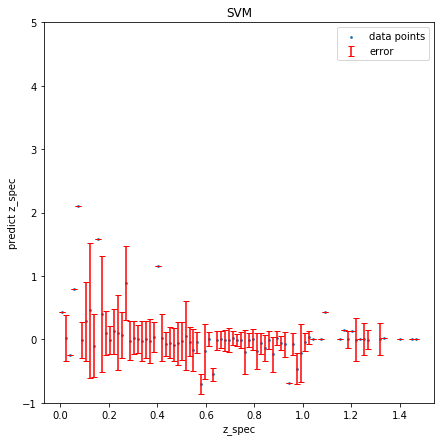

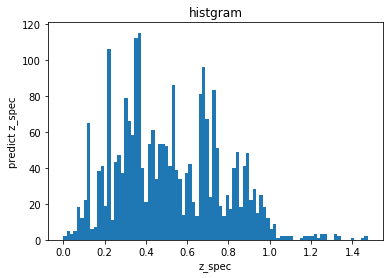

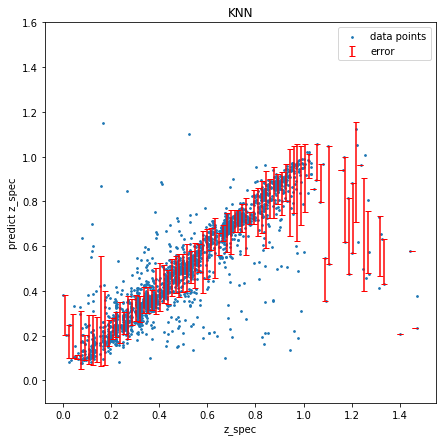

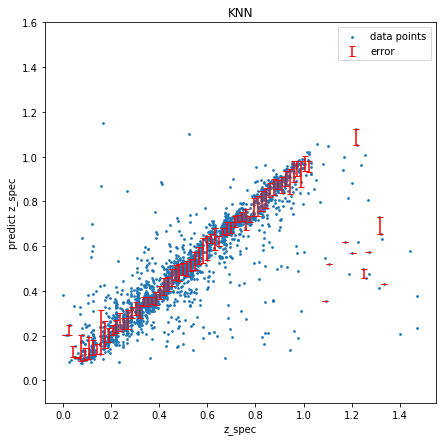

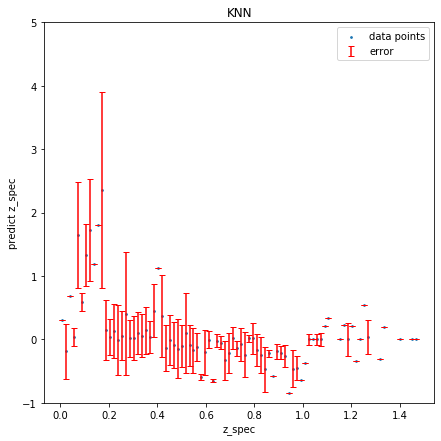

In [74]:
z_spec_test=np.asarray(Y_test)
for name,z_pre in z_pres.items():
    metrics(name,z_spec_test,z_pre)